<a href="https://colab.research.google.com/github/27jorge05/27jorge051/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive



drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")

In [5]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dados los parámetros clínicos sobre un paciente, ¿Podríamos predecir si tendrá o no una enfermedad cardíaca?

In [11]:
categorical_val = []
continous_val = []
for column in df.columns:

  if len(df[column].unique()) <= 10:
    categorical_val.append(column)
  else:
    continous_val.append(column)


age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [15]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val, dtype=int)


In [16]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler
# Estandarizar las características eliminando la media y escalando a la varianza a la unidad
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [17]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2>Árboles de decisión<h2>

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0,
 min_samples_leaf=7, min_samples_split=2)
tree.fit(X_train, y_train)
p = tree.predict(X_test)
print("Accuracy", accuracy_score(p, y_test))
print("F1 score", f1_score(p, y_test))
print("Precision", precision_score(p, y_test))
print("Recall", recall_score(p, y_test))

Accuracy 0.7692307692307693
F1 score 0.7835051546391752
Precision 0.76
Recall 0.8085106382978723


<h2>Random Forest<h2>



In [23]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=3, max_features=0.3, max_leaf_nodes=None,
 min_impurity_decrease=0.0,
min_samples_leaf=10, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=1000)
rand_forest.fit(X_train, y_train)
p_rf = rand_forest.predict(X_test)
print("Accuracy", accuracy_score(p_rf, y_test))
print("F1 score", f1_score(p_rf, y_test))
print("Precision", precision_score(p_rf, y_test))
print("Recall", recall_score(p_rf, y_test))

Accuracy 0.8241758241758241
F1 score 0.8431372549019608
Precision 0.86
Recall 0.8269230769230769


<h2>Support Vector Machine<h2>


In [24]:
from sklearn.svm import SVC
svm_model = SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3, gamma=0.001,
 kernel='rbf', max_iter=-1)
svm_model.fit(X_train, y_train)
p_svm = svm_model.predict(X_test)
print("Accuracy", accuracy_score(p_svm, y_test))
print("F1 score", f1_score(p_svm, y_test))
print("Precision", precision_score(p_svm, y_test))
print("Recall", recall_score(p_svm, y_test))

Accuracy 0.6813186813186813
F1 score 0.7128712871287128
Precision 0.72
Recall 0.7058823529411765


<h2>KNN- K vecinos cercanos<h2>

In [27]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
neighbors = range(1, 21)
for k in neighbors:
 model = KNeighborsClassifier(n_neighbors=k)
 model.fit(X_train, y_train)
 train_score.append(accuracy_score(y_train, model.predict(X_train)))
 test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 0.6923076923076923


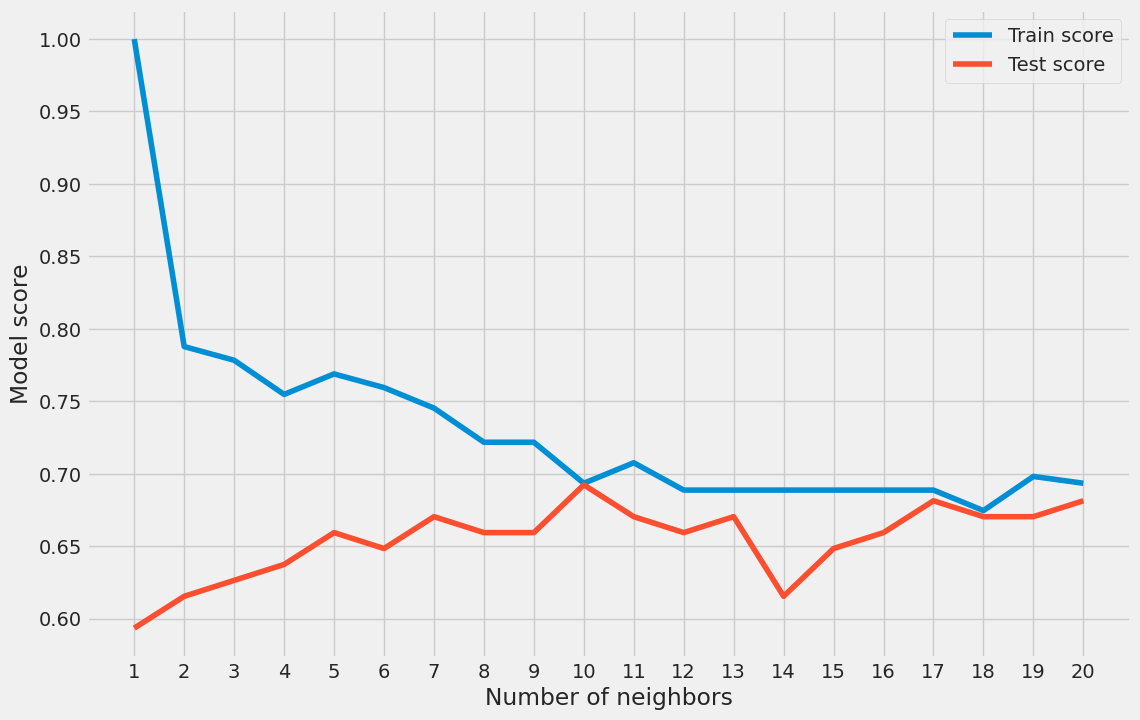

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print("Maximum KNN score on the test data:", max(test_score))

In [30]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)
p_knn = knn_classifier.predict(X_test)
print("Accuracy", accuracy_score(p_knn, y_test))
print("F1 score", f1_score(p_knn, y_test))
print("Precision", precision_score(p_knn, y_test))

Accuracy 0.6923076923076923
F1 score 0.7142857142857143
Precision 0.7


<h2>Naive Bayes<h2>

In [31]:
from sklearn.naive_bayes import GaussianNB
GBmodel = GaussianNB()
GBmodel.fit(X_train, y_train)
p_GB = GBmodel.predict(X_test)
print("Accuracy", accuracy_score(p_GB, y_test))
print("F1 score", f1_score(p_GB, y_test))
print("Precision", precision_score(p_GB, y_test))
print("Recall", recall_score(p_GB, y_test))

Accuracy 0.8351648351648352
F1 score 0.8421052631578947
Precision 0.8
Recall 0.8888888888888888


<h2> Selección de mejores parámetros usando GridSearch <h2>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Seleccionamos el tipo de clasificador, en este caso RandomForest.
clf_optimo = RandomForestClassifier()
# Parámetros del clasificador
parameters = {'n_estimators': [10, 20, 30, 50],
 'max_features': [0.2, 0.3,0.5],
 'criterion': ['entropy', 'gini'],
 'max_depth': [2, 3, 5, 10],
 'min_samples_split': [2, 3, 5],
 'min_samples_leaf': [1,5,8]
 }
# n_estimators es el número de árboles en el bosque
# Número de features a considerar en cada split. log2(n_f)
# Tipo de evaluación utilizada para comparar las combinaciones hechas
# por el algoritmo.
acc_scorer = make_scorer(accuracy_score)
# se ejecuta la busqueda Grid
grid_obj = GridSearchCV(clf_optimo, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)
# Se establece para el clasificador la mejor combinación de parámetros
clf_optimo = grid_obj.best_estimator_
# Se ajusta el mejor algoritmo a los datos
clf_optimo.fit(X_train, y_train)
predictions = clf_optimo.predict(X_test)
# se imprime el accuracy
print(accuracy_score(y_test, predictions))

<h2>Comparando con la librería CompStats<h2>

In [32]:
pip install CompStats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00


In [34]:
import sklearn
sklearn.__version__

'1.6.1'

In [35]:
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from CompStats import all_differences, difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import f1_score
import pandas as pd

<h2>Creando los datos para alimentar a CompStats<h2>

In [37]:
concentrado = pd.DataFrame()

In [38]:
concentrado['Decision Tree'] = p
concentrado['Random Forest'] = p_rf
concentrado['SVM'] = p_svm
concentrado['KNN'] = p_knn
concentrado['NaiveB'] = p_GB

In [40]:
concentrado['y'] = list(y_test)

In [42]:
score = lambda y, hy: f1_score(y, hy, average='weighted')

In [43]:
perf = performance(concentrado, score=score, num_samples=1000)

100%|██████████| 6/6 [00:44<00:00,  7.35s/it]


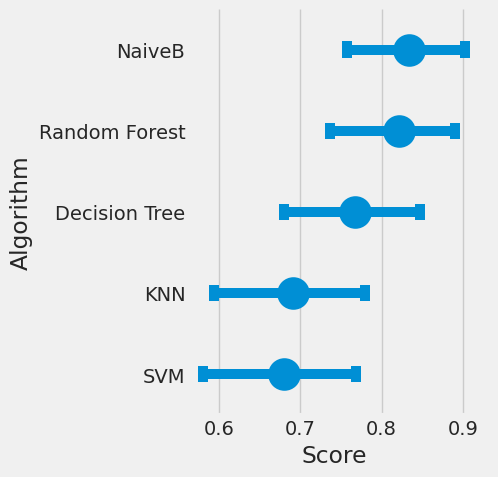

In [44]:
face_grid = plot_performance(perf)

<h2>
<h2>

<h2>
Performance Comparison against the Winner¶
<h2>



In [46]:
diff = difference(perf)
diff.info

{'best': 'NaiveB'}

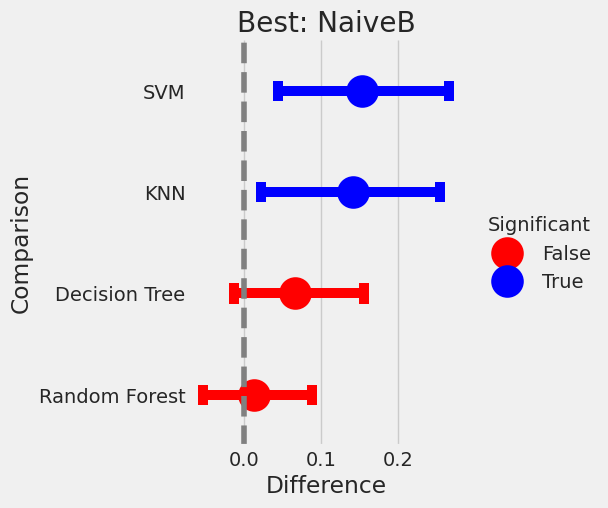

In [47]:
face_grid_diff = plot_difference(diff)

<h2>
Comparación de rendimiento entre todos los modelos
<h2>

In [48]:
all_diff = all_differences(perf)
p_values = difference_p_value(all_diff)
p_values

{'NaiveB - Random Forest': np.float64(0.341),
 'NaiveB - Decision Tree': np.float64(0.066),
 'NaiveB - KNN': np.float64(0.009),
 'NaiveB - SVM': np.float64(0.003),
 'Random Forest - Decision Tree': np.float64(0.062),
 'Random Forest - KNN': np.float64(0.007),
 'Random Forest - SVM': np.float64(0.004),
 'Decision Tree - KNN': np.float64(0.101),
 'Decision Tree - SVM': np.float64(0.072),
 'KNN - SVM': np.float64(0.371)}